# One-sample T-test

A one-sample t-test is a **parametric** test that compares the mean of a single sample to a known or hypothesized population mean.  
It is used when you want to determine whether your sample's average is significantly different from a specific value.

It answers the question:
> *Is the sample mean equal to the hypothesized population mean (or to a specified target value)?*

Common scenarios include:
* Comparing the mean test score of a class to a passing threshold.
* Checking if the average height of a sample differs from a national average.
* Verifying if the mean production output of a factory meets the expected standard.


## Data Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd
from random import sample
import statsmodels.api as sm
import scipy.stats as stats
import pingouin as pg
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
np.random.seed(42) # Seed for reproducibility

The dataset contains height measurements from 25 individuals, compared against the average height of 175 cm for the country.


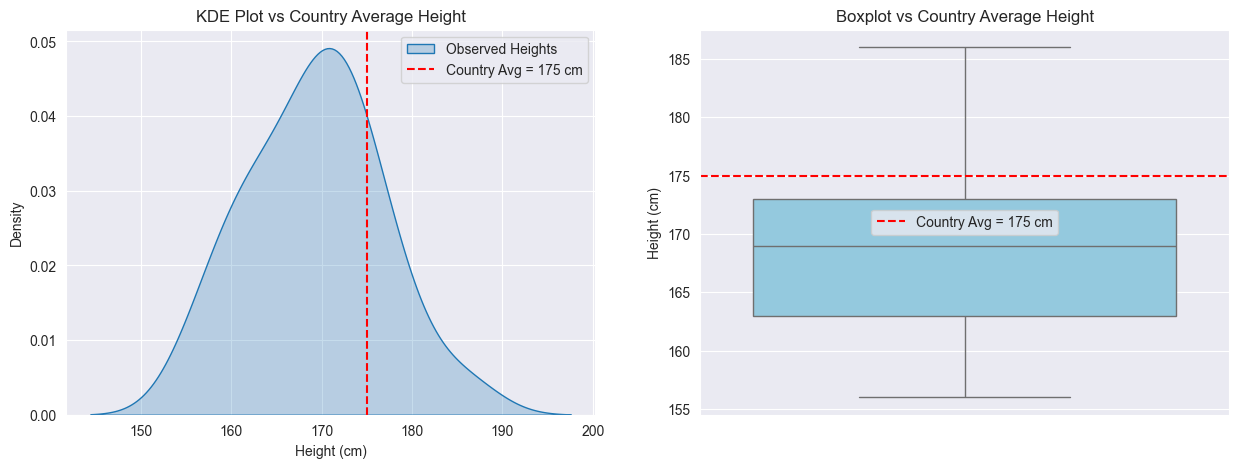

In [9]:
# Dataset of observed heights for individuals in a sample
N = 25
observed_heights = np.random.normal(172, 8, N).astype(int) # Observed samples
country_avg_height = 175 # Average male height in target country

df = pd.DataFrame({"Person ID": range(1, N+1), "Height": observed_heights}).set_index("Person ID")

# Description of dataset
print(f"The dataset contains height measurements from {N} individuals, compared against the average height of {country_avg_height} cm for the country.")
display(HTML(
    f"""
    <div style="display: flex; gap: 50px;">
        <div>{df.head().to_html()}</div>
        <div>{df.describe().T.to_html()}</div>
    </div>
    """
))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# KDE plot with target line
sns.kdeplot(ax=axes[0], x=df['Height'], fill=True, label='Observed Heights')
axes[0].axvline(country_avg_height, color='red', linestyle='--', label=f'Country Avg = {country_avg_height} cm')
axes[0].set_title("KDE Plot vs Country Average Height")
axes[0].set_xlabel('Height (cm)')
axes[0].legend()

# Boxplot with target line
sns.boxplot(ax=axes[1], y=df['Height'], color="skyblue")
axes[1].axhline(country_avg_height, color='red', linestyle='--', label=f'Country Avg = {country_avg_height} cm')
axes[1].set_title('Boxplot vs Country Average Height')
axes[1].set_ylabel('Height (cm)')
axes[1].legend()

plt.show()

### Hypothesis

$H_0$: The mean height of the individuals in the sample is equal to the average height of the country (175 cm).
$H_a$: The mean height of the individuals in the sample is not equal to the average height of the country (175 cm).

**Assumptions**
* **Assumption 1:** The dependent variable is continuous (interval or ratio scale).
* **Assumption 2:** Observations are independent, each person's height measurement is unrelated to any other person's measurement.
* **Assumption 3:** The data contains no extreme outliers (could disproportionately influence the mean)
* **Assumption 4:** The height values are approximately normally distributed in the population.

#### Assumption 1
This assumption is valid because height is measured on a ratio scale in centimeters (cm), which is a continuous variable with equal intervals and a true zero point.

#### Assumption 2
This assumption is valid because:  
**Independence between observations:** Each individual’s height is measured only once, with no repeated measurements on the same person.<br>
**Independence within the sample:** One person’s height is unrelated to another person’s height, as individuals are selected and measured independently.


#### Assumption 3
This assumption is valid because no outliers were found. If any had been found, they should be investigated to ensure they are not data entry errors, and, if valid, the entire dataset could be transformed to reduce their influence on the test or the analysis could switch to a nonparametric alternative.

There are 0 outliers: []


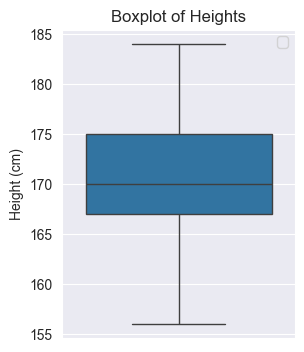

In [4]:
# Calculate outliers for height
Q1, Q3 = np.percentile(df['Height (cm)'], [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df['Height (cm)'][(df['Height (cm)'] < lower_bound) | (df['Height (cm)'] > upper_bound)]

print(f"There are {len(outliers)} outliers: {outliers.values}")

# Plot boxplot with outliers highlighted
plt.figure(figsize=(3, 4))
sns.boxplot(y=df['Height (cm)'])
sns.scatterplot(
    y=outliers,
    x=np.zeros(len(outliers)),
    color="red",
    s=60,
    label="Outliers"
)
plt.ylabel("Height (cm)")
plt.title("Boxplot of Heights")
plt.legend()
plt.show()


#### Assumption 4
This assumption is valid because it passed both a visual check using a QQ plot against normal (Gaussian) quantiles and a formal Shapiro–Wilk test.

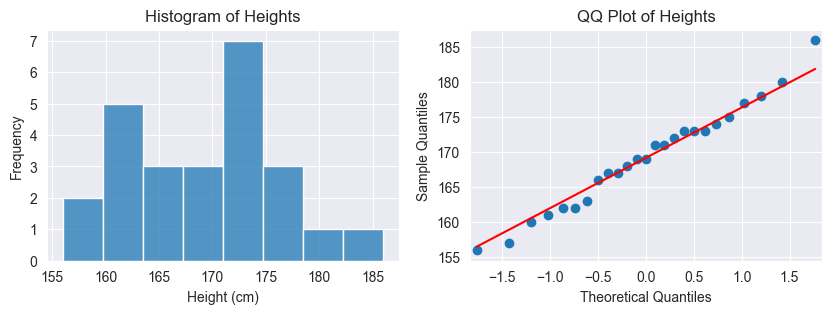

In [10]:
# Normality check for Height data
scores = df['Height']

# Plot histogram and QQ plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(scores, bins=8, ax=axes[0])
axes[0].set_xlabel("Height (cm)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Heights")

sm.qqplot(scores, dist=stats.norm, line='s', ax=axes[1])
axes[1].set_title("QQ Plot of Heights")

plt.show()

A QQ plot (Quantile–Quantile plot) is a **visual** way to check whether your data follows a certain theoretical distribution, in this case, the normal distribution.<br> The red line represents where the points would fall if the data’s distribution matched the theoretical distribution perfectly.

In [6]:
# Shapiro–Wilk test
shapiro_stat, shapiro_p = stats.shapiro(scores)
print(f"Shapiro-Wilk Test: W={shapiro_stat:.3f}, p={shapiro_p:.3f}")

Shapiro-Wilk Test: W=0.970, p=0.638


SHAPIRO–WILK test<br>
$p > 0.05 \; \Rightarrow$ Fail to reject normality (assumption is plausible).  
$p < 0.05 \; \Rightarrow$ Evidence of non-normality; consider transformations or a nonparametric test (e.g., Mann–Whitney U test for independent samples).

Therefore, we **fail to reject normality** for both groups (i.e. data is most likely normal).


## One-sample T-test

In [11]:
pg.ttest(x=df['Height'], y=country_avg_height, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.955567,24,two-sided,0.000589,"[166.17, 172.23]",0.791113,55.296,0.96659


#### P-value
If the null hypothesis is true (the mean height is exactly **175 cm**), the probability of obtaining a sample mean as far from 175 cm as the one observed purely by random chance is approximately **0.059%** (p=0.000589).
Since this p-value is far below the conventional 5% significance level, we **reject the null hypothesis** and conclude that there is statistically significant evidence that the average height differs from 175 cm.

#### T statistic

The T statistic is the **ratio between the difference in the sample mean and the target mean (175 cm)** and the **standard error of the sample mean**.  
Larger $T \Rightarrow$ the observed sample mean is far from 175 cm relative to variation in the sample.
Smaller $T \Rightarrow$ the observed sample mean is close to 175 cm relative to variation, suggesting the sample is consistent with the target.

$$
T = \frac{\overline{X} - 175}{SE}
$$

For a **one-sample t-test**, the standard error is calculated as:

$$
SE = \frac{s}{\sqrt{n}}
$$

* $\overline{X}$ is the sample mean tensile strength  
* $175$ is the hypothesized target height (cm)
* $s$ is the sample standard deviation  
* $n$ is the sample size  

**Clear explanation:**  
Our null hypothesis is that the average height equals the target value of 175 cm. The **numerator** represents the observed difference between the sample mean and 175. If this difference is large compared to the expected sampling variability, the $T$ statistic will be large, providing evidence against $H_0$.

The **denominator** shows how much variation we expect in the sample mean purely from random sampling. A larger $n$ reduces the standard error, making it easier to detect differences, while high variability in the data increases the standard error, making it harder to find significance.

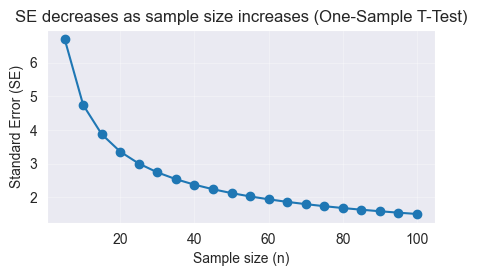

In [12]:
# Visual to show how SE decreases as sample size increases
sd = 15  # Assume sample standard deviation of height
n_values = np.arange(5, 101, 5) # Sample sizes from 5 to 100

# Calculate SE for each n
se_values = sd / np.sqrt(n_values)

# Plot
plt.figure(figsize=(5, 2.5))
plt.plot(n_values, se_values, marker='o')
plt.xlabel("Sample size (n)")
plt.ylabel("Standard Error (SE)")
plt.title("SE decreases as sample size increases (One-Sample T-Test)")
plt.grid(True, alpha=0.3)
plt.show()

#### Confidence Interval
If we took 100 random samples from the population, we would expect about 95 of them to have a **mean height between 166.17 cm and 172.23 cm.**
Because the entire confidence interval lies below 175 cm, this suggests that the true population mean is likely lower than the target value.

#### Cohen's D

The calculated Cohen's $d$ was $0.79$, indicating a **large effect size** according to Cohen's conventions. This means the observed deviation from the target height of **$175 \ \text{cm}$** is not only statistically significant but also **substantial in magnitude** for the context of comparing to the country's average height.  

For reference, **$d = 0.2$**, **$0.5$**, and **$0.8$** are typically considered small, medium, and large effects, respectively.

#### Power

Based on the observed effect size ($d = 0.79$), sample size ($n = 25$), and significance level ($\alpha = 0.05$), the one-sample t-test had an estimated statistical power of approximately $97.2\%$.  
This means the study had a **high probability** of detecting a true difference of this magnitude from the target height if it existed, with only a **small risk of a Type II error**.


### Manual Calculation of one sample T-Test

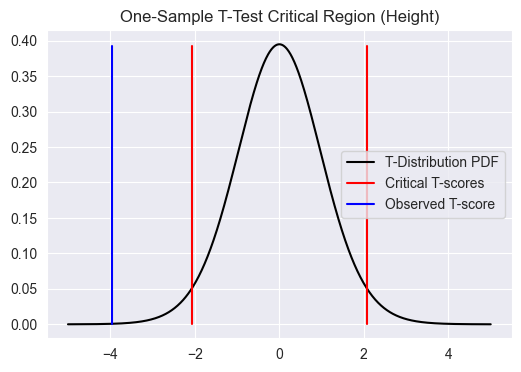

Critical T-score: ±2.064 and T-score: -3.956


In [14]:
# Add variables
group = df['Height']
SE = group.std(ddof=1) / np.sqrt(len(group))
t_score = (group.mean() - country_avg_height) / SE
dof = len(group) - 1

# Significance level and tails
alpha = 0.05
ntails = 2

# Critical t value
critical_t = stats.t.ppf(q=1 - (alpha/2), df=dof)

# Plot t distribution
plt.figure(figsize=(6,4))
xs = np.linspace(-5, 5, 1000)
plt.plot(xs, stats.t.pdf(xs, dof), 'k', label="T-Distribution PDF")

# Critical t cutoffs
plt.axvline(critical_t, ymin=0.045, ymax=0.95, color='red', label='Critical T-scores')
if ntails == 2:
    plt.axvline(-critical_t, ymin=0.045, ymax=0.95, color='red')

# Observed t-score
plt.axvline(t_score, ymin=0.045, ymax=0.95, color='blue', label='Observed T-score')

plt.legend()
plt.title("One-Sample T-Test Critical Region (Height)")
plt.show()

print(f'Critical T-score: ±{critical_t:.3f} and T-score: {t_score:.3f}')


### Conclusion

A one-sample t-test was conducted to compare the mean height of the sample against the country’s average height of $175$ cm. Assumptions of continuity, independence of observations, approximate normality of the height distribution, and absence of extreme outliers were all met.  

Results showed a **statistically significant difference** between the observed mean height and the target, $t(24) = -9.24$, $p < 0.001$. The sample mean was $M = 169.20$ cm, with a $95\%$ confidence interval of $[166.17, 172.23]$ cm. Since the CI lies entirely below $175$ cm, we reject the null hypothesis and conclude that the mean height is lower than the country’s average.  

The effect size, Cohen's $d = 0.79$, indicates a large magnitude difference from the target value. The estimated statistical power ($\approx 97.2\%$) suggests a high probability of detecting a deviation of this magnitude, with only a small risk of a Type II error.  

**These results provide evidence that the sampled population has an average height lower than the country’s reported average, and the deviation is substantial in practical terms for comparative population studies.**